## Семинар 8: Линейные модели (Linear models)

<a href="https://colab.research.google.com/github/SergeyMalashenko/MachineLearning_Summer_2023/blob/main/seminars/8/seminar_8.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [72]:
from scipy.io import loadmat
from io import BytesIO
import requests

from sklearn.metrics import mean_squared_error
from sklearn         import linear_model

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd
import numpy   as np
import scipy   as sp

In [73]:
def get_features_and_label(dataset, is_training):
    """
    Gets matrices representing features and target from the original data set
    Parameters
    ----------
    dataset: DataFrame
      Original dataset
    is_training : str
      Label to show whether a data point is in training data or not.
        * "T" -> Training data
        * "F" -> Test data
    Return
    ------
      X : ndarray
        Feature matrix
      y : ndarray
        Lpsa values of each data point.
    """
    X = dataset.loc[dataset.train == is_training].drop("train", axis=1)
    y = X.pop("lpsa")
    return X, y


### Набор данных

Prostate Cancer Dataset (Набор данных рака предстательной железы)

Набор данных состоит из 97 наблюдений и 10 переменных (из которых 8 числовых переменных и одна категориальная переменная и является ID), которые выглядят следующим образом:

| Признак | Описание                           |
|---------|------------------------------------|
| lcavol  | (log) Cancer Volume                |
| lweight | (log) Weight                       |
| age     | Patient age                        |
| lbph    | (log) Vening Prostatic Hyperplasia |
| svi     | Seminal Vesicle Invasion           |
| lcp     | (log) Capsular Penetration         |
| gleason | Gleason score                      |
| pgg45   | Percent of Gleason score 4 or 5    |
| lpsa    | (log) Prostate Specific Antigen    |



In [74]:
path = "data/prostate.csv"
X = pd.read_csv(path, sep="\t").iloc[:, 1:]
X_train, y_train = get_features_and_label(X, "T")
X_test , y_test  = get_features_and_label(X, "F")

print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [75]:
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler().fit(X.loc[:, "lcavol":"pgg45"])

X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test ),columns = X_test .columns)
X_scaled       = pd.concat([X_train, X_test])

X_scaled.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000


### Визуализация данных

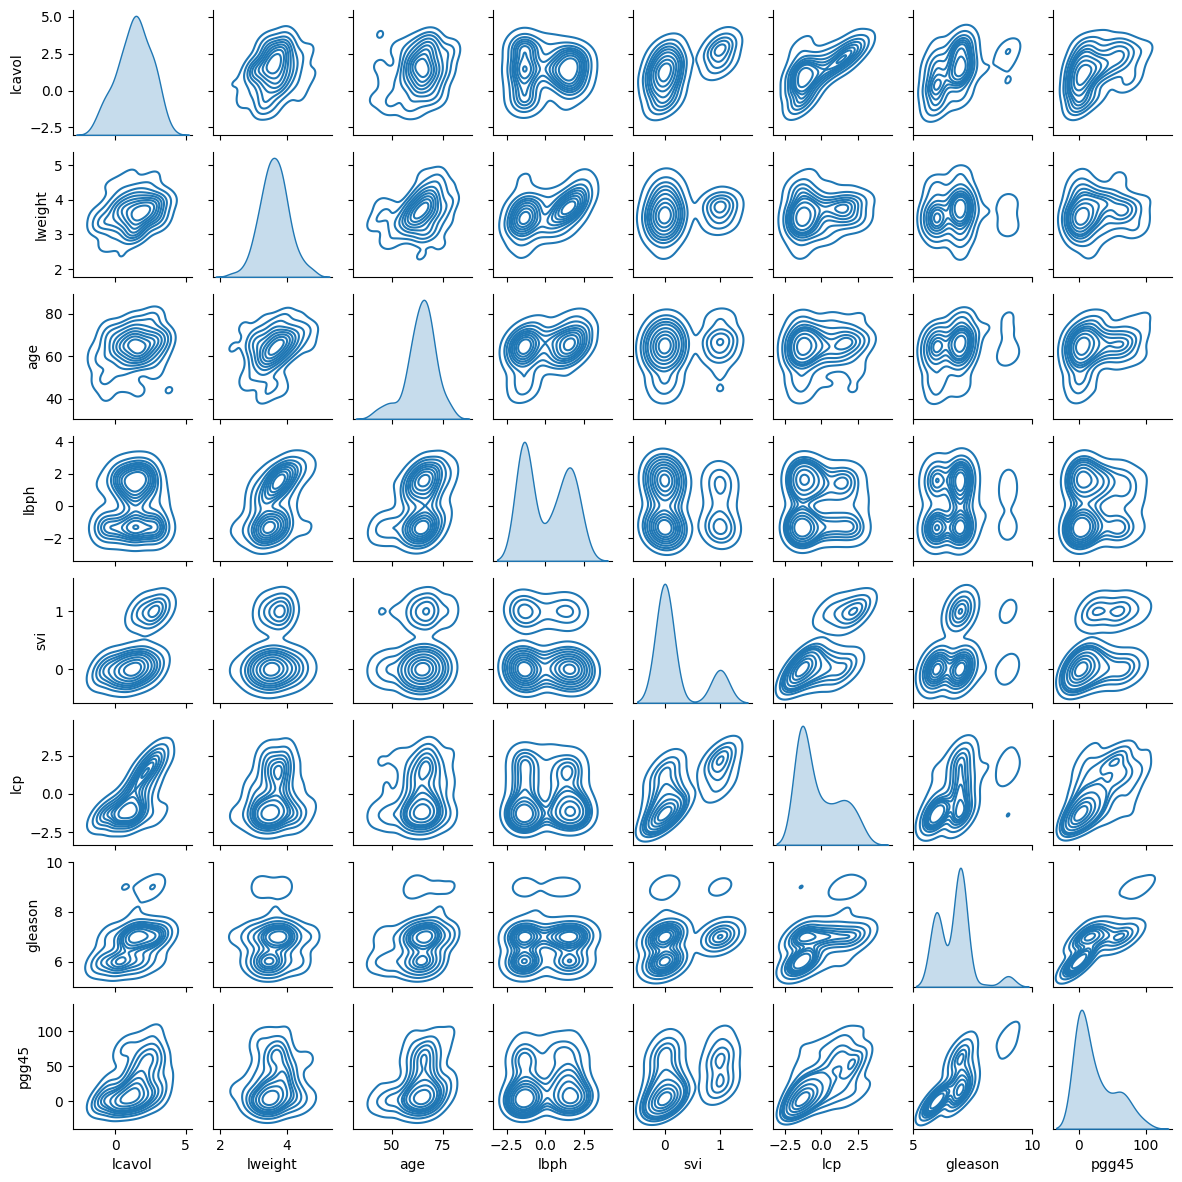

In [76]:
sns.pairplot(X_scaled, height=1.5, kind="kde");

<AxesSubplot:>

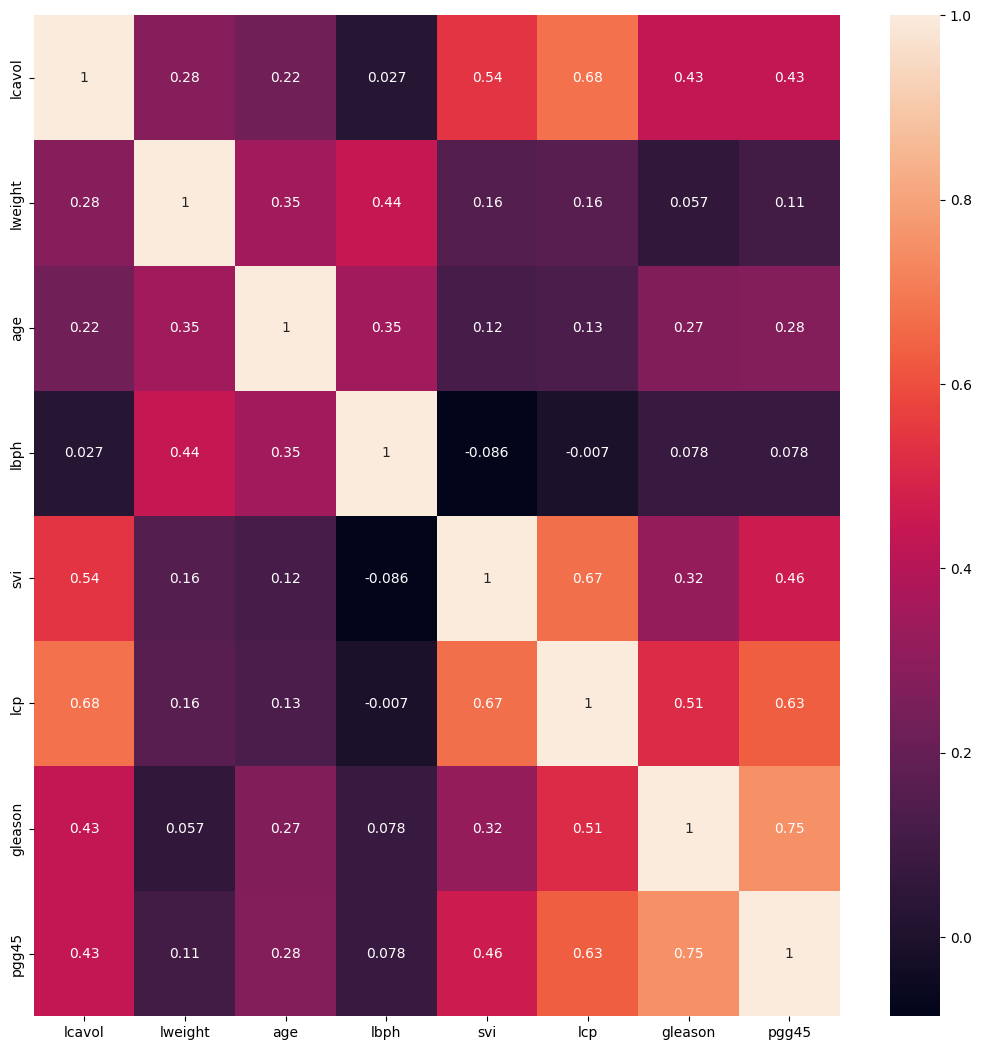

In [77]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(X_scaled.corr(method='pearson'), annot=True)

### Linear regression (Линейная регрессия)
Линейная регрессия представляет собой модель вида 
$$
\vec{y} = W{\cdot}\vec{x} + \vec{b}
$$


/tmp/ipykernel_45218/2968950236.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


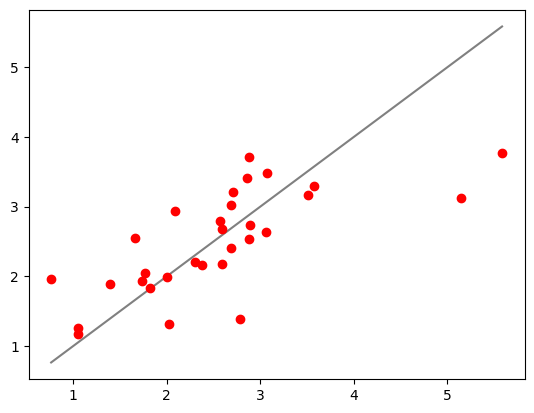

0.5212740055076

In [78]:
# LinearRegression
current_model = linear_model.LinearRegression()
current_model.fit(X_train_scaled, y_train)
y_pred =  current_model.predict(X_test_scaled)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

mean_squared_error(y_test, y_pred)

Метод линейно регрессии приближает наборы данных прямыми, плоскостями и гиперплоскостями. 
Складывается впечатление, что этот подход ограничивается лишь строго линейными отношениями между переменными, но ослабление этого требования также возможно.

### Конструирование признаков

Одним из приемов, позволяющих адаптировать линейную регрессию к нелинейным связям между переменными, является преобразование данных в соответствии с некоторым *набором функций*.

In [79]:
from sklearn.pipeline import make_pipeline

#### Полиномиальные функции (Polynomial basis features)
Исходные признаки
$$
\{ x, y, z\}
$$

Целевые признаки
$$
\{ x, y, z, x^2, y^2, z^2, xy, xz, yz, ... \}
$$



/tmp/ipykernel_45218/3210121976.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


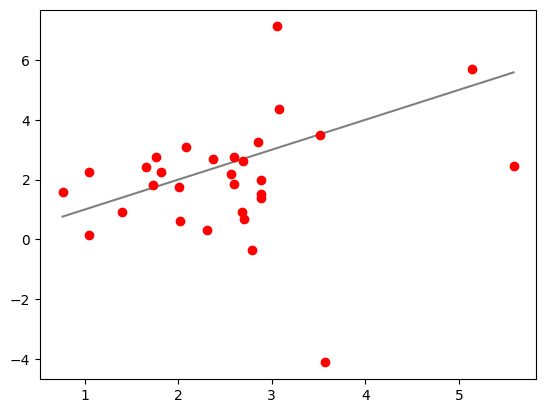

4.076527869625304

In [80]:
from sklearn.preprocessing import PolynomialFeatures

current_model = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
current_model.fit(X_train_scaled, y_train)
y_pred =  current_model.predict(X_test_scaled)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

mean_squared_error(y_test, y_pred)

#### Пользовательские функции (Custom features)

/tmp/ipykernel_45218/438175648.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test.values, y_pred, 'or', color='red' )


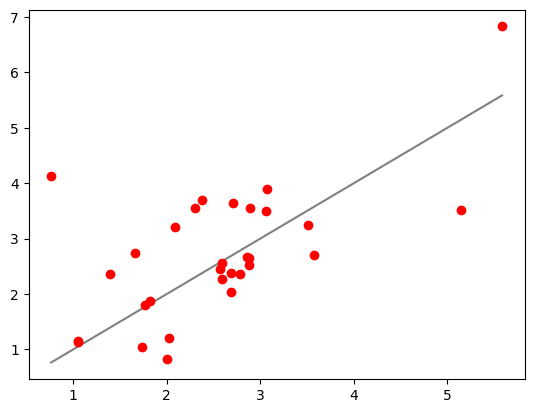

0.9549176169712399

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

RP_REGRESSION_TERMS_P1 = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1]
])
RP_REGRESSION_TERMS_P2 = np.concatenate((RP_REGRESSION_TERMS_P1,
np.array([
    [1/2, 1/2, 0, 0, 0, 0, 0, 0], [1/2, 0, 1/2, 0, 0, 0, 0, 0], [1/2, 0, 0, 1/2, 0, 0, 0, 0], [1/2, 0, 0, 0, 1/2, 0, 0, 0], [1/2, 0, 0, 0, 0, 1/2, 0, 0], [1/2, 0, 0, 0, 0, 0, 1/2, 0], [1/2, 0, 0, 0, 0, 0, 0, 1/2],
    [0, 1/2, 1/2, 0, 0, 0, 0, 0], [0, 1/2, 0, 1/2, 0, 0, 0, 0], [0, 1/2, 0, 0, 1/2, 0, 0, 0], [0, 1/2, 0, 0, 0, 1/2, 0, 0], [0, 1/2, 0, 0, 0, 0, 1/2, 0],[0, 1/2, 0, 0, 0, 0, 0, 1/2],
    [0, 0, 1/2, 1/2, 0, 0, 0, 0], [0, 0, 1/2, 0, 1/2, 0, 0, 0], [0, 0, 1/2, 0, 0, 1/2, 0, 0], [0, 0, 1/2, 0, 0, 0, 1/2, 0], [0, 0, 1/2, 0, 0, 0, 0, 1/2],
    [0, 0, 0, 1/2, 1/2, 0, 0, 0], [0, 0, 0, 1/2, 0, 1/2, 0, 0], [0, 0, 0, 1/2, 0, 0, 1/2, 0], [0, 0, 0, 1/2, 0, 0, 0, 1/2],
    [0, 0, 0, 0, 1/2, 1/2, 0, 0], [0, 0, 0, 0, 1/2, 0, 1/2, 0], [0, 0, 0, 0, 1/2, 0, 0, 1/2],
    [0, 0, 0, 0, 0, 1/2, 1/2, 0], [0, 0, 0, 0, 0, 1/2, 0, 1/2],
    [0, 0, 0, 0, 0, 0, 1/2, 1/2]
])))
RP_REGRESSION_TERMS = np.array([RP_REGRESSION_TERMS_P1, RP_REGRESSION_TERMS_P2], dtype=object)

class RootPolynomialFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, degree):
        self.degree = degree
        self.is_fitted_ = False
        if degree > 2: self.degree_ = 2
        if degree < 0: raise ValueError('degree must not be less than zero')
    
    def fit(self, X, y = None):
        self.n_output_features_ = 8
        self.terms_ = RP_REGRESSION_TERMS[0]
        if self.degree == 2: 
            self.n_output_features_ = 28
            self.terms_ = RP_REGRESSION_TERMS[1]
               
        self.n_samples_, self.n_input_features_ = X.shape
        self.is_fitted_ = True

        return self

    def transform(self, X, y=None):
        if not self.is_fitted_:
            raise ValueError('Not fitted yet')
        features = []
        for term in self.terms_:
            features.append(np.prod(np.power(X, term), axis = 1))
        return np.array(features).T

    def fit_transform(self, X, y=None):
        self = self.fit(X, y)
        return self.transform(X, y)

current_model = make_pipeline(RootPolynomialFeatures(2),linear_model.LinearRegression())

current_model.fit(X_train_scaled, y_train)
y_pred =  current_model.predict(X_test_scaled)

plt.plot(y_test.values, y_test.values,color='grey')
plt.plot(y_test.values, y_pred, 'or', color='red' )
plt.show()

mean_squared_error(y_test, y_pred)

### Регуляризация

Применение разнообразных функций в нашей линейной модели делает ее намного гибче,
но также и быстро приводит к переобучению. Например, если выбрать
слишком много Гауссовых базисных функций, мы в итоге получим не слишком
хорошие результаты.

### Ridge regression (Гребневая регрессия)

Вероятно, самый часто встречающийся вид регуляризации — гребневая регрессия (ridge regression), или $L_2$ -регуляризация ($L_2$ -regularization), также иногда называемая регуляризацией Тихонова. Она заключается в наложении штрафа на сумму квадратов (евклидовой нормы) коэффициентов модели.

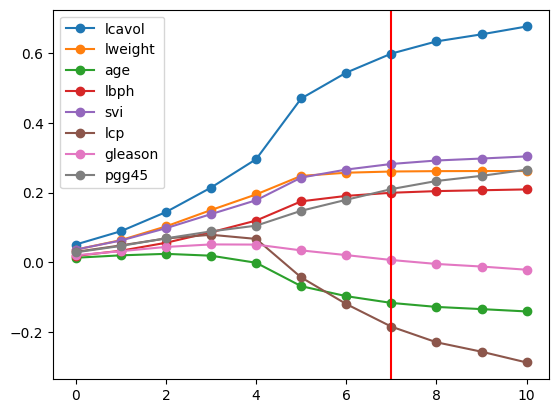

0.4971938434698393

In [82]:
# Ridge regression
#n_alpha = 30
#alpha_s = np.logspace(5, 0, n_alpha)
alpha_s = [ 1024, 512, 256, 128, 64, 16, 8, 4, 2, 1, 1e-05]

coefs = map(lambda a: linear_model.Ridge(alpha=a).fit(X_train_scaled, y_train).coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))

# Ridge regression with cross validation
best_model = linear_model.RidgeCV(alpha_s)
b = best_model.fit(X_train_scaled, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == best_model.alpha_), c="r")
plt.legend(X_train_scaled.columns)
#pml.savefig("prostate_data.pdf")
plt.show()

y_pred = b.predict(X_test_scaled)

mean_squared_error(y_test, y_pred)

### Lasso regression (Лассо регрессия)

Следующий тип регуляризации — так называемая лассо-регуляризация, включающая штраф на сумму абсолютных значений ($L_1$ -норма) коэффициентов регрессии

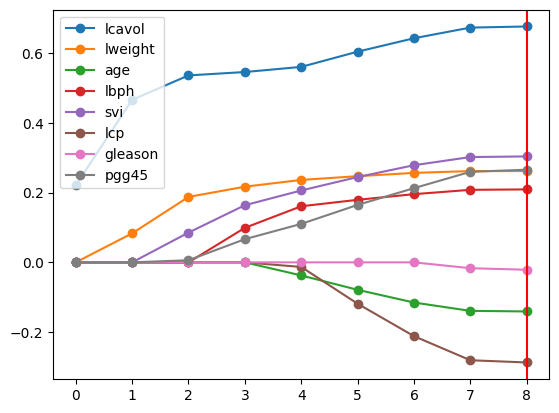

0.521273976369338

In [83]:
# Lasso regression
#n_alpha = 30
#alpha_s = np.linspace(0.0000000001, 1, n_alpha)
alpha_s = [0.680, 0.380, 0.209, 0.100, 0.044, 0.027, 0.012, 0.001, 0.00000001]

coefs = map(lambda a: linear_model.Lasso(alpha=a).fit(X_train_scaled, y_train).coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))

# Lasso regression with cross validation
best_model = linear_model.LassoCV(alphas=alpha_s)
b = best_model.fit(X_train_scaled, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == best_model.alpha_), c="r")
plt.legend(X_train_scaled.columns)
plt.show()

y_pred = b.predict(X_test_scaled)

mean_squared_error(y_test, y_pred)

### ElasticNet = Ridge Regression + Lasso Regression

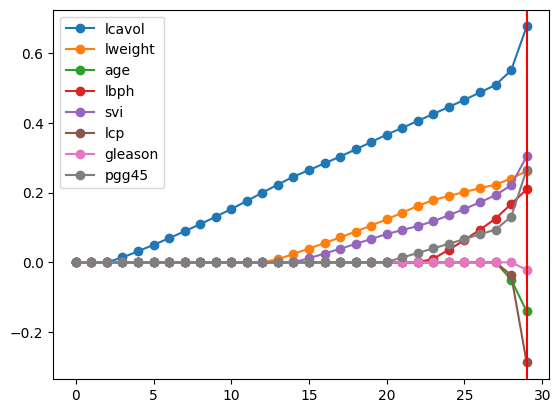

0.5212738273178942

In [84]:
# ElasticNet
n_alpha = 30
alpha_s = np.linspace(2, 0.0000001, n_alpha)

coefs = map(lambda a: linear_model.ElasticNet(alpha=a).fit(X_train_scaled, y_train).coef_.flatten(), alpha_s)
coefs = np.array(list(coefs))

# Lasso regression with cross validation
best_model = linear_model.ElasticNetCV(alphas=alpha_s)
b = best_model.fit(X_train_scaled, y_train)

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alpha_s == best_model.alpha_), c="r")
plt.legend(X_train_scaled.columns)
plt.show()

y_pred = b.predict(X_test_scaled)
mean_squared_error(y_test, y_pred)